# Creating metafeatures

## Goals

* Explore the visualization of UCI wine dataset through combinations of features
* Identify a combination of features which separates cultivars

In [ ]:
!pip install --user scprep

## 1. Loading [the UCI wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

You've done this before.

In [15]:
import scprep
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn import datasets, preprocessing

#### Load data

We'll load the data into a `pandas` DataFrame as we did last time.

In [4]:
wine = datasets.load_wine()

# Access the numerical data from the wine Bunch
data = wine['data']

# Load data about the rows and columns
feature_names = wine['feature_names']

# Load cultivar information about each wine
cultivars = np.array(['Cultivar{}'.format(cl) for cl in wine['target']])

# Create nice names for each row
wine_names = np.array(['Wine{}'.format(i) for i in range(data.shape[0])])

# Gather all of this information into a DataFrame
data = pd.DataFrame(data, columns=feature_names, index=wine_names)

# Print the first 5 rows of the data, eq. to data[:5]
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Wine0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
Wine1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
Wine2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
Wine3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
Wine4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 2. Visualizing data in 2D

Next, you'll pick a cultivar and try to find features that separate that cultivar from the others. First, just try plotting two variables.

#### Select a cultivar

In [ ]:
my_cultivar = "Cultivar0" # alternative: "Cultivar1", "Cultivar2"

#### Plot two variables

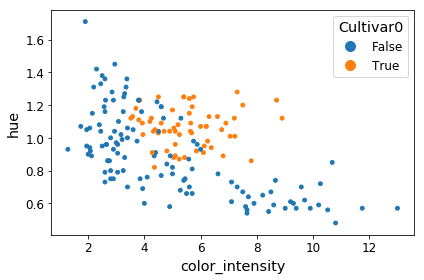

In [8]:
scprep.plot.scatter(x=data['color_intensity'], y=data['hue'],
                    c=cultivars == my_cultivar, legend_title=my_cultivar)

Play around with the choices of variables and see what works best to separate your cultivar from the others. You can choose from any of `data.columns`.

In [9]:
print(data.columns)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


### Exercise n.1 - find two variables that best separate your chosen cultivar from the others

In [ ]:
scprep.plot.scatter(x=data[???], y=data[???],
                    c=cultivars == my_cultivar, legend_title=my_cultivar)

## 3. Creating metafeatures

You'll notice that it was very difficult to get good separation of cultivars using just two variables. We can do better by combining multiple variables, as shown below.

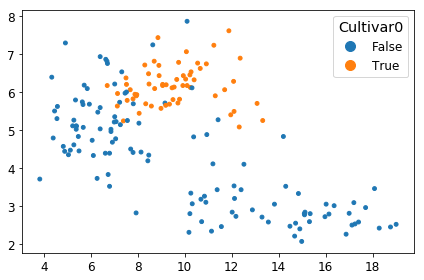

In [10]:
scprep.plot.scatter(x=data['color_intensity'] + 2 * data['malic_acid'], 
                    y=3 * data['hue'] + data['flavanoids'],
                    c=cultivars == my_cultivar, legend_title=my_cultivar)

#### Comparing feature magnitudes

When summing variables together, we need to think about the relative ranges. If we look at the scales of the features in the wine dataset, we will see they vary drastically in size.

In [13]:
# compute the mean and standard deviation of each feature
data.aggregate([np.mean, np.std]).round(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91


#### Scaling data

For simplicity, we will first scale (or z-score) each feature to have the same mean and variance; this will allow you to sum them without having to worry about which has higher absolute values (for example, if we summed `'ash'` (on the order of 1-2) and `'proline'` (on the order of 500-1000) together, the ash values would have little to no effect on the sum.

In [21]:
# use the sklearn StandardScaler to scale to mean 0, variance 1
data_scaled = preprocessing.StandardScaler().fit_transform(data)

# turn the result back into a pandas DataFrame
data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=data.columns)

# compute the mean and standard deviation of each feature
data_scaled.aggregate([np.mean, np.std]).round(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
mean,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Much better. Now we can sum features together without worrying about magnitude.

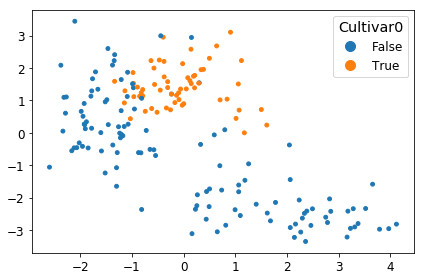

In [22]:
scprep.plot.scatter(x=data_scaled['color_intensity'] + data_scaled['malic_acid'], 
                    y=data_scaled['hue'] + data_scaled['flavanoids'],
                    c=cultivars == my_cultivar, legend_title=my_cultivar)

Now it's your turn. Can you find a combination of features that cleanly separates your chosen cultivar from the others?

## Exercise  - find two combinations of variables that best separate your chosen cultivar from the others

In [ ]:
x = data_scaled[???] + data_scaled[???] + ...
y = data_scaled[???] + data_scaled[???] + ...
scprep.plot.scatter(x=x, y=y,
                    c=cultivars == my_cultivar, legend_title=my_cultivar)